<h2> Nauczanie maszynowe/Ćwiczenia2

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Zaimplementowałem zadania z poprzednich zajęć w postaci klasy.

In [14]:
#Klasa dedykowana regresji liniowej 2 zmiennych

class LinearModel2v:
    def __init__(self, eta = 0.001, diff = 0.001, w1 = 1, w2 = 1, w0 = 1, maxiter = 10000):
        self.eta = eta
        self.diff = diff
        self.w1 = w1
        self.w2 = w2
        self.w0 = w0
        self.maxiter = maxiter
        
    def loss_function(self, X, t):
        N = len(X)
        C = sum((X[:,0]*self.w1+X[:,1]*self.w2+self.w0-t)**2)
        return C/N
    
    def update_weights(self, X, t):
        N = len(X)
        y_pred = X[:,0]*self.w1+X[:,1]*self.w2+self.w0
        dC1 = sum(2*(y_pred-t)*X[:,0])
        dC2 = sum(2*(y_pred-t)*X[:,1])
        dC0 = sum(2*(y_pred-t))

        self.w1 = self.w1 - self.eta*dC1/N
        self.w2 = self.w2 - self.eta*dC2/N
        self.w0 = self.w0 - self.eta*dC0/N

    def train(self, X, t):
        l = []
        ile = 0
        while True:
            l.append(self.loss_function(X, t))
            self.update_weights(X, t)
            ile += 1
            if len(l)>2:
                if abs(l[-1]-l[-2])/l[-1] <  self.diff or ile > self.maxiter:
                    break

Zobaczmy jak to działa na jakimś konkretnym przykładzie

In [15]:
X = np.array([[1,4],[5,6],[2,2],[6,7],[9,-4],[-2,-3],[-5,1]])
y = np.dot(X, [3, -4])+5  #y=3x1-4x2+5

In [16]:
model = LinearModel2v()
model.train(X, y)

In [17]:
model.w1, model.w2, model.w0, model.loss_function(X, y)

(3.000000310064517,
 -3.9999996744761828,
 4.999995767319016,
 1.2496363358765161e-11)

<h3> Regresja wielomianowa

In [6]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))

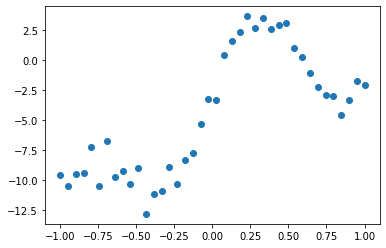

In [7]:
rng = np.random.RandomState(1)
x = np.linspace(-1, 1, 40)
y = 3*x**3 - 4*x**2 + 6*x - 3 + 5*np.sin(5*x) + rng.randn(40)

plt.scatter(x,y)
plt.show()

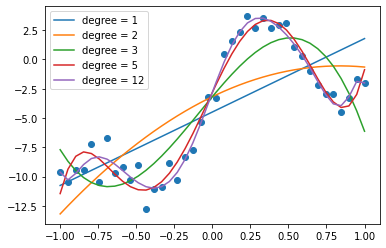

In [9]:
plt.scatter(x,y)

for d in [1, 2, 3, 5, 12]:
    y_pred = PolynomialRegression(d).fit(x[:, np.newaxis], y).predict(x[:, np.newaxis])
    plt.plot(x, y_pred, label = f"degree = {d}")
    
plt.legend(loc = "best")
plt.show()

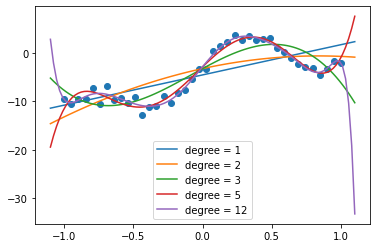

In [10]:
#a jak to jest na większym przedziale?
plt.scatter(x,y)

for d in [1, 2, 3, 5, 12]:
    y_pred = PolynomialRegression(d).fit(x[:, np.newaxis], y).predict(np.linspace(-1.1,1.1,100)[:, np.newaxis])
    plt.plot(np.linspace(-1.1,1.1,100), y_pred, label = f"degree = {d}")
    
plt.legend(loc = "best")
plt.show()

Wniosek: Przy zbyt wysokim stopniu zastosowanego wielomianu możemy mieć problem z generalizacją - następuje przeuczenie (overfitting).


Z wielomianami związany jest też inny problem - efekt Rungego

<h3> Regularyzacja

Wprowadzenie szerszej klasy funkcji bazowych jak i ilości parametrów może bardzo szybko prowadzić do zjawiska overfittingu (przetrenowania). Jak sobie z tym poradzić? Na przykład, wprowadzając pewne dodatkowe obciążenie do funkcji kosztu zależne od współczynników:

- Regularyzacja L2 (Ridge Regression): $LF^{+} = \alpha \sum_i w_{i}^{2}$ 

- Regularyzacja L1 (Lasso Regression): $LF^{+} = \alpha \sum_i |w_{i}|$

tzn. $LF_{new} = LF + LF^{+}$.

<h4> Zadanie1: Zdefiniuj klasę implementującą regresję liniową z regularyzacją L1/L2 dla dowolnej liczby zmiennych.

<h4> Zadanie2: Wybierz dowolny zbiór danych lub wygeneruj syntetyczne dane. Zastosuj model regresji liniowej z regularyzacją $L1$. Na podstawie zbioru walidacyjnego wybierz optymalne parametry $\eta$ oraz $\alpha$ (rozważ chociaż 15-20 różnych kombinacji).

<h3> Regresja logistyczna

Rozważamy zmienną losową $Y$ przyjmującą tylko dwie wartości, tzn. $ Y \in \lbrace 0, 1 \rbrace$. Załóżmy dodatkowo, że $p = P(Y=1)$ (wtedy $1-p = P(Y=0)$). Będziemy chcieli zamodelować $p$ w oparciu o pewne cechy $X_1,..,X_n$. Jako, że $p \in (0,1)$, to $\frac{p}{1-p} \in (0,\infty)$ i dalej $\log(\frac{p}{1-p}) \in (-\infty, \infty)$. Tę ostatnią wartość będziemy przybliżać za pomocą modelu regresji liniowej, tzn:
<br>

<center>
    $\log(\frac{p}{1-p}) = X_1w_1+X_2w_2+...+X_nw_n+X_0$
    
Przekształcając powyższe równanie otrzymujemy, że $p = \frac{1}{1+e^{-(X_1w_1+X_2w_2+...+X_nw_n+X_0)}}$
    
Funkcja kosztu zdefiniowana nie jest jest już różnicą pomiędzy przewidywaną wartością a przewidywaniem modelu. Czemu? Tym razem stosujemy entropię krzyżową. $LF = -\frac{1}{N}\sum_i (y_i \log(p(X_{1}^{i},..,X_{n}^{i}))+(1-y_i) \log(1-p(X_{1}^{i},..,X_{n}^{i})))$.
    
Regularyzacja $L_2$ w przypadku regresji logistycznej. $LF = -\frac{1}{N}\sum_i (y_i \log(p(X_{1}^{i},..,X_{n}^{i}))+(1-y_i) \log(1-p(X_{1}^{i},..,X_{n}^{i}))) + \alpha||w||^2$. Analogicznie w przypadku $L_1$
    
W przypadku regresji logistycznej częściej posługujemy się parameterem $C = \frac{1}{\alpha}$. Jeżeli $C$ małe, to silna regularyzacja, 

In [13]:
from sklearn import linear_model

model = linear_model.LogisticRegression()

X = np.array([[1,2],[2,3],[4,5],[1,-4],[5,-7],[-3,-1]])
y  = np.array([0, 0, 0, 1, 1, 1])

model.fit(X,y);

In [14]:
model.coef_, model.intercept_ #parametry modelu

(array([[-0.39682866, -0.82497163]]), array([0.11932619]))

In [15]:
model.predict([[3,3]]), model.predict_proba([[3,3]]) #predykcja klasy oraz odpowiednie prawdopodobienstwa

(array([0]), array([[0.97197068, 0.02802932]]))

<h4> Zadanie3: Uzasadnij powyższe wartości prawdopodobieństw w oparciu o parametry modelu.

<h4> Zadanie4: Zaimplementuj klasę dla regresji logistycznej (wraz z regularyzacją $L_1$ oraz $L_2$).

<h3> Regresja logistyczna wieloklasowa

W tym przypadku stosujemy prawdpodobieństwa SoftMax, tzn $P(X=i) = \frac{e^{z_i}}{\sum_j e^{z_j}}$

In [17]:
from collections import Counter
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, n_classes=3, random_state=1) #generuje sobie dane

print(X.shape, y.shape)
print(Counter(y))

(1000, 10) (1000,)
Counter({1: 334, 2: 334, 0: 332})


In [18]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model.fit(X, y);

In [19]:
print(model.coef_, model.intercept_) #parametry modelu

[[ 0.01577681 -0.05318977  0.21160694  0.14655186 -0.24476592 -0.00318551
  -0.20914917 -0.26505038 -0.02765106  0.26778537]
 [ 0.20327639  0.0990516  -0.39851296 -0.1045002   0.02344135 -0.06340171
   0.19494493  0.54495946 -0.18417782 -0.2844254 ]
 [-0.2190532  -0.04586183  0.18690602 -0.04205165  0.22132456  0.06658722
   0.01420424 -0.27990908  0.21182888  0.01664003]] [ 0.0294703  -0.26754233  0.23807203]


In [32]:
#nowa obserwacja
row = [1.89149379, -0.39847585, 1.63856893, 0.01647165, 1.51892395, -3.52651223, 1.80998823, 0.58810926, -0.02542177, -0.52835426]
#przewiduje jej klasę
yhat = model.predict([row])
print(f'Przewidziana klasa: {yhat[0]}')

Przewidziana klasa: 1


In [33]:
#przewiduje prawdopodobienstwa
yhat = model.predict_proba([row])
print(f'Przewidziane prawdopodobieństwa: {yhat[0]}')

Przewidziane prawdopodobieństwa: [0.16470456 0.50297138 0.33232406]


<h4> Zadanie5: Wyznacz powyższe prawdopodobieństwa ręcznie na podstawie parametrów modelu.

Przykład praktyczny

In [24]:
import pandas as pd 

#dane i opis danych: https://archive.ics.uci.edu/ml/datasets/Wine
df_wine = pd.read_csv('wine.data')
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash', 
                   'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanolds', 
                   'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 
                   'Hue', 'OD280/OD315 of diluted wines', 'Proline']
df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanolds,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [34]:
print('Kategorie: ', np.unique(df_wine['Class label']))

Kategorie:  [1 2 3]


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [35]:
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [28]:
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [29]:
lr1 = LogisticRegression(penalty='l2', C=0.1)
lr1.fit(X_train_std, y_train)

print('Dokladnosc na zbiorze treningowym:', lr1.score(X_train_std, y_train))
print('Dokladnosc na zbiorze testowym:', lr1.score(X_test_std, y_test))

Dokladnosc na zbiorze treningowym: 0.991869918699187
Dokladnosc na zbiorze testowym: 1.0


In [30]:
weights, params = [], []
for c in np.arange(-4, 6):
    lr = LogisticRegression(penalty='l2', C=10.**c, random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10.**c)
    
weights = np.array(weights)

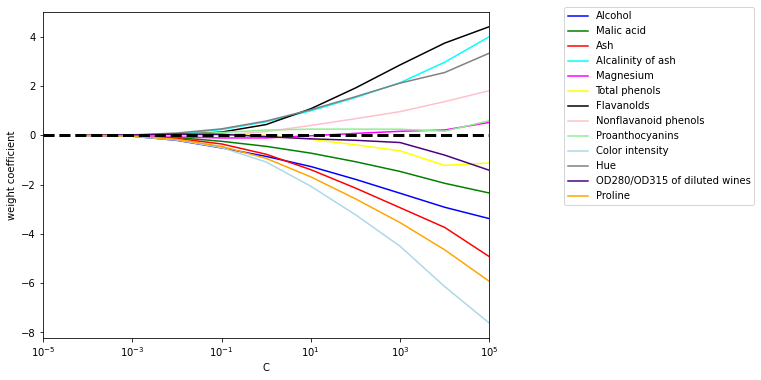

In [31]:
fig = plt.figure(figsize=(8, 6))
ax = plt.subplot(111)
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 
          'pink', 'lightgreen', 'lightblue', 'gray', 'indigo', 'orange']

for column, color in zip(range(weights.shape[1]), colors):
    plt.plot( params, 
              weights[:, column], 
              label=df_wine.columns[column+1],
              color=color)
    
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center',
          bbox_to_anchor=(1.38, 1.03),
          ncol=1, 
          fancybox=True)
plt.show()

<h4> Zadanie6: Wyjaśnij powyższy wykres? Co oznacza to rozgałęzienie?

<h3> Uzupełnienie: Jak to było w Pytorch? (Regresja liniowa i logistyczna)

In [441]:
import torch 
import torch.nn as nn

X = torch.tensor([[1.], [2], [3], [4]])
y = torch.tensor([[7.], [9], [11], [13]]) #czyli Y = a*X + b,  gdzie a=2, X=5

n_samples, n_features = X.shape  #n_samples - ile obserwacji (tutaj 4), n_features - ile zmiennych (tutaj 1)


input_size = 1 #liczba cech
output_size = 1 #przeiwdywany Y ma byc liczbą


class LinearRegression(nn.Module):
    def __init__(self, input_dim, output_dim):
        super().__init__()
        self.lin = nn.Linear(input_dim, output_dim)
    def forward(self, x):
        return self.lin(x)
    
model = LinearRegression(input_size, output_size)

learning_rate = 0.01

loss_function = nn.MSELoss() #Funkcja kosztu 
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

n_iters= 1000

for epoch in range(n_iters):
    #Krok Forward: Obliczenie przewidywanych wartosci Y oraz funkcji kosztu
    y_predicted = model(X)
    loss = loss_function(y_predicted, y)
    
    #Krok Backward: Obliczenie gradientu z funkcji kosztu i aktualizacja parametrów modeli
    loss.backward()
    optimizer.step()

    #Zerujemy gradient przed kolejnym przejściem
    optimizer.zero_grad()

    if (epoch) % 200 == 0:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')

epoch: 1, loss = 134.0706
epoch: 201, loss = 0.6888
epoch: 401, loss = 0.2076
epoch: 601, loss = 0.0626
epoch: 801, loss = 0.0189


In [442]:
list(model.parameters())

[Parameter containing:
 tensor([[2.0627]], requires_grad=True),
 Parameter containing:
 tensor([4.8155], requires_grad=True)]

In [440]:
X = torch.tensor([[1.,2],[2,3],[4,5],[1,-4],[5,-7],[-3,-1]])
y = torch.tensor([[0.], [0], [0], [1], [1], [1]])

n_samples, n_features = X.shape  #n_samples - ile obserwacji (tutaj 4), n_features - ile zmiennych (tutaj 2)


class Model(nn.Module):
    def __init__(self, n_input_features):
        super().__init__()
        self.linear = nn.Linear(n_input_features, 1) #tu: y=wx+b

    def forward(self, x):
        y_pred = torch.sigmoid(self.linear(x)) #potem licze 1/(1+e^(-y))
        return y_pred

model = Model(n_features)

#Parametry + funkcja kosztu + optymalizator
num_epochs = 1000
learning_rate = 0.01
loss_function = nn.BCELoss() #binary cross-entropy 
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

#Trenowanie
for epoch in range(num_epochs):
    #Forward
    y_pred = model(X)
    loss = loss_function(y_pred,y)

    #Backward
    loss.backward()
    optimizer.step()

    #Zeriwanie grdientu przed kolejnym przejsciem
    optimizer.zero_grad()

    if (epoch+1) % 50 == 0:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')

epoch: 50, loss = 0.2691
epoch: 100, loss = 0.1571
epoch: 150, loss = 0.1091
epoch: 200, loss = 0.0826
epoch: 250, loss = 0.0662
epoch: 300, loss = 0.0550
epoch: 350, loss = 0.0470
epoch: 400, loss = 0.0410
epoch: 450, loss = 0.0363
epoch: 500, loss = 0.0326
epoch: 550, loss = 0.0295
epoch: 600, loss = 0.0270
epoch: 650, loss = 0.0249
epoch: 700, loss = 0.0231
epoch: 750, loss = 0.0215
epoch: 800, loss = 0.0201
epoch: 850, loss = 0.0189
epoch: 900, loss = 0.0179
epoch: 950, loss = 0.0169
epoch: 1000, loss = 0.0160


In [438]:
list(model.parameters())

[Parameter containing:
 tensor([[-0.6137, -1.3399]], requires_grad=True),
 Parameter containing:
 tensor([0.4171], requires_grad=True)]

<h3> Uzupełnienie: Szukanie minimum

Znajdź minimum funkcji $f(w_1,w_2) = (w_1-1)^2+(w_2+3)^2$

In [13]:
from scipy.optimize import minimize 

fun = lambda w: (w[0] - 1)**2 + (w[1] + 3)**2
res = minimize(fun, (2, 0), method='SLSQP')
print(res.x) #gdzie jest minimum?

[ 1. -3.]
